# Testing Code for the hardware

In [1]:
import tensorflow as tf
import numpy as np

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Check if TensorFlow is using a GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using the following GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPU available. Using CPU instead.")

# Define a simple matrix multiplication function
def matrix_multiplication_test():
    # Create two random matrices
    matrix_a = tf.constant(np.random.rand(1000, 1000), dtype=tf.float32)
    matrix_b = tf.constant(np.random.rand(1000, 1000), dtype=tf.float32)

    # Perform matrix multiplication
    with tf.device('/GPU:0' if gpus else '/CPU:0'):
        result = tf.linalg.matmul(matrix_a, matrix_b)

    print("Matrix multiplication completed.")

# Run the matrix multiplication test
matrix_multiplication_test()


TensorFlow version: 2.10.0
No GPU available. Using CPU instead.
Matrix multiplication completed.


In [6]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.102  Python-3.10.13 torch-2.4.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Setup complete  (16 CPUs, 15.9 GB RAM, 420.2/476.1 GB disk)


# Directory Checker

In [3]:
import os

label_directory = "df/X-ray baggage detection.v1-prohibited_items.yolov9/train"
print("Directory Exists:", os.path.exists(label_directory))

Directory Exists: True


---

---

# Pre-Processing and Training in YOLOV8

## Used for Downloading yolov8n.pt

In [1]:
from ultralytics import YOLO

# Load the YOLOv8 nano model
model = YOLO("yolov8s.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:02<00:00, 9.82MB/s]


In [ ]:
from ultralytics import YOLO
# import os
# os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

# Load the YOLOv8 model
model = YOLO("yolov9/yolov9c.pt")  # Use yolov8s.pt, yolov8m.pt, etc. for different sizes

# Train the model with the provided dataset
model.train(data="data.yaml", epochs=30, imgsz=480, batch=52, device=0)


In [2]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


CUDA Available: False
GPU Name: No GPU found


# Testing of Model

In [1]:
from ultralytics import YOLO
# Load the trained YOLOv8 model (assuming you have saved the best weights)
model = YOLO("runs/detect/train8/weights/last.pt")  # Replace "exp" with the correct folder if it differs

# Evaluate the model on the test set defined in 'data.yaml'
results = model.val(data="data.yaml", split="test")


Ultralytics 8.3.1  Python-3.10.13 torch-2.3.0 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [02:47


                   all        883        883      0.894      0.849      0.902      0.429
                     0        166        166      0.978      0.982      0.989      0.531
                     1        193        193      0.878       0.87      0.926      0.429
                     2        118        118      0.825       0.64      0.781       0.34
                     3        203        203      0.854      0.835      0.893      0.418
                     4        203        203      0.935      0.919      0.921      0.428
Speed: 1.2ms preprocess, 177.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val11


In [1]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("runs/detect/train8/weights/last.pt")

# Evaluate the model on the test set and save visual results
results = model.val(data="data.yaml", split="test", save=True)

# Check the runs directory for evaluation results, such as plots and confusion matrix


Ultralytics YOLOv8.2.102  Python-3.10.13 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:08


                   all        883        883      0.894      0.849      0.902      0.429
                     0        166        166      0.978      0.982      0.989      0.531
                     1        193        193      0.878       0.87      0.926      0.429
                     2        118        118      0.825       0.64      0.781       0.34
                     3        203        203      0.854      0.835      0.893      0.418
                     4        203        203      0.935      0.919      0.921      0.429
Speed: 0.5ms preprocess, 3.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\val5


# Bounding Box in YOLOv8

## Testing dataset Bounding Box


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\009519_jpg.rf.016edf3b696cb8d1a6d3212b4bb1f810.jpg: 480x480 1 2, 10.3ms
Speed: 1.0ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 480)


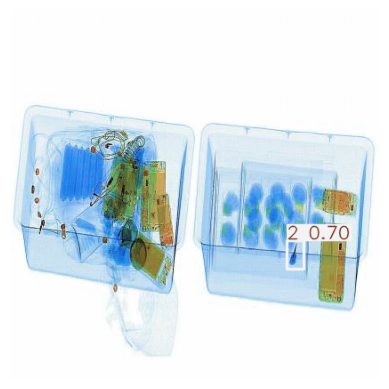

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/009519_jpg.rf.016edf3b696cb8d1a6d3212b4bb1f810.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\009127_jpg.rf.67531292a2589900150f91e51405d03a.jpg: 480x480 1 2, 164.5ms
Speed: 5.0ms preprocess, 164.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 480)


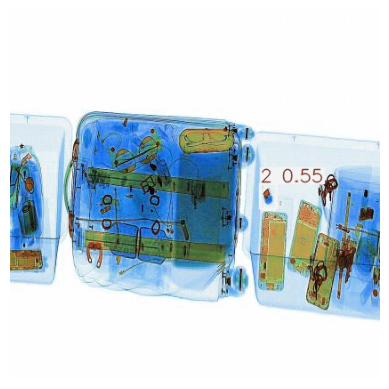

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/009127_jpg.rf.67531292a2589900150f91e51405d03a.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\009588_jpg.rf.0d916c0fb89534ff88daaea716e9fb05.jpg: 480x480 1 2, 29.1ms
Speed: 1.9ms preprocess, 29.1ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 480)


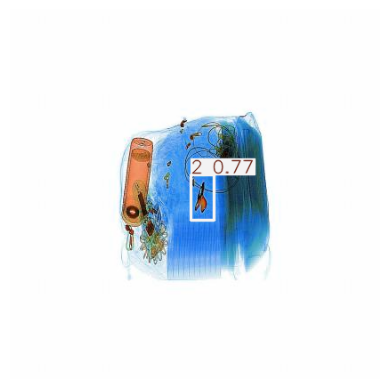

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/009588_jpg.rf.0d916c0fb89534ff88daaea716e9fb05.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\042547_jpg.rf.b8522eb9a0fb0ad95cdae6cd129bc4b2.jpg: 480x480 2 1s, 158.0ms
Speed: 6.6ms preprocess, 158.0ms inference, 7.5ms postprocess per image at shape (1, 3, 480, 480)


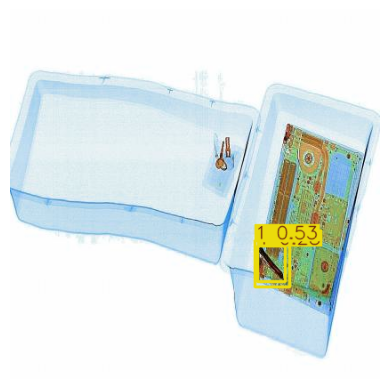

In [1]:
# 
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/042547_jpg.rf.b8522eb9a0fb0ad95cdae6cd129bc4b2.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010364_jpg.rf.ec576a42e101cb2f116a236ec9f2a124.jpg: 480x480 1 2, 131.9ms
Speed: 2.0ms preprocess, 131.9ms inference, 8.5ms postprocess per image at shape (1, 3, 480, 480)


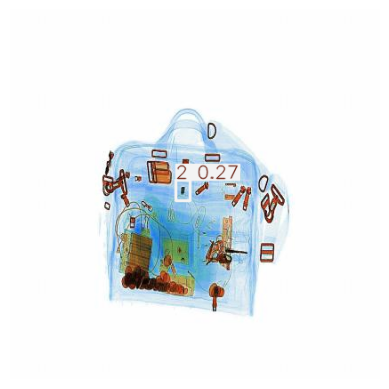

In [1]:
# 
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010364_jpg.rf.ec576a42e101cb2f116a236ec9f2a124.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\017814_jpg.rf.472cbaa7f46b175a55e907114bd5253b.jpg: 480x480 1 0, 112.9ms
Speed: 1.1ms preprocess, 112.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 480)


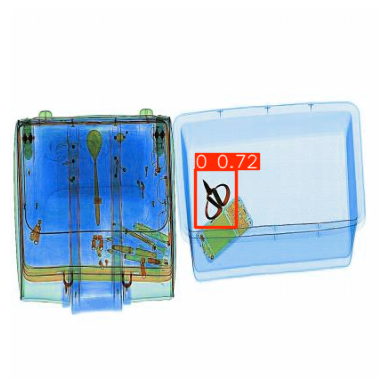

In [2]:
# 
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/017814_jpg.rf.472cbaa7f46b175a55e907114bd5253b.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\042096_jpg.rf.3795fd37fe308c174fb1574104710700.jpg: 480x480 2 4s, 113.2ms
Speed: 2.0ms preprocess, 113.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)


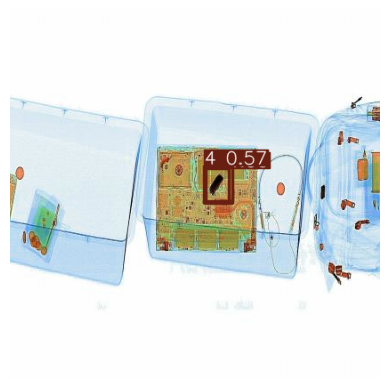

In [2]:
# 
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/042096_jpg.rf.3795fd37fe308c174fb1574104710700.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010125_jpg.rf.7e3607c6f865cf2822555d7f3203a462.jpg: 480x480 2 2s, 10.2ms
Speed: 1.0ms preprocess, 10.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 480)


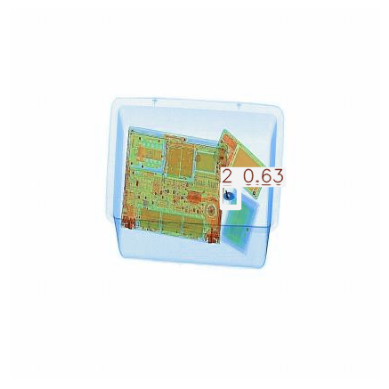

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010125_jpg.rf.7e3607c6f865cf2822555d7f3203a462.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\023617_jpg.rf.72bae6c3081355ff32f1f85706758902.jpg: 480x480 1 0, 31.3ms
Speed: 2.0ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 480)


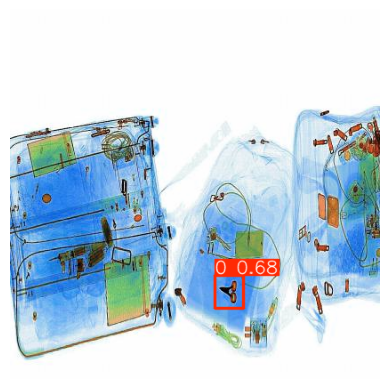

In [13]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/023617_jpg.rf.72bae6c3081355ff32f1f85706758902.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\026588_jpg.rf.50c11bd5da61c4bb2b1acaa55e63ec64.jpg: 480x480 1 1, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 480)


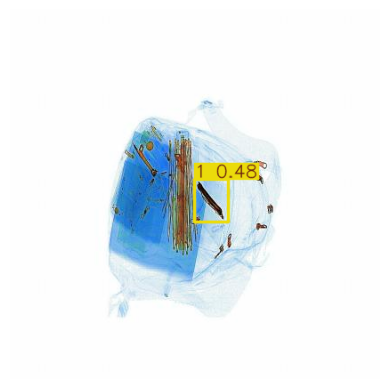

In [14]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/026588_jpg.rf.50c11bd5da61c4bb2b1acaa55e63ec64.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\027050_jpg.rf.d51d0fb0dd3264d967215a1ef8020c05.jpg: 480x480 1 3, 15.5ms
Speed: 1.6ms preprocess, 15.5ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 480)


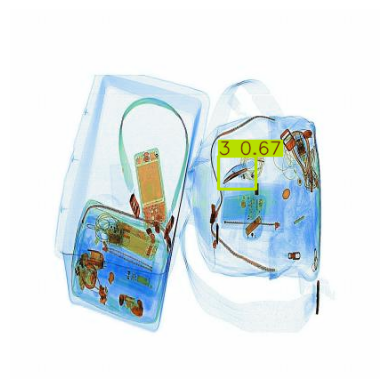

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/027050_jpg.rf.d51d0fb0dd3264d967215a1ef8020c05.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010032_jpg.rf.39c0b1f643cd83c6dcfd15827bcfef3c.jpg: 480x480 1 2, 25.1ms
Speed: 6.9ms preprocess, 25.1ms inference, 227.8ms postprocess per image at shape (1, 3, 480, 480)


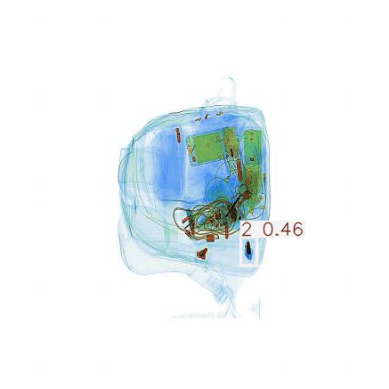

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010032_jpg.rf.39c0b1f643cd83c6dcfd15827bcfef3c.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010272_jpg.rf.b7f9471013edc32e647aae1c50029d4a.jpg: 480x480 1 2, 47.5ms
Speed: 5.3ms preprocess, 47.5ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 480)


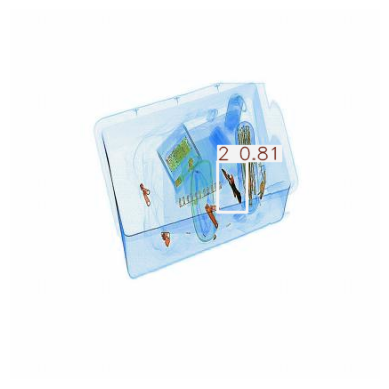

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010272_jpg.rf.b7f9471013edc32e647aae1c50029d4a.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010634_jpg.rf.00a2daa8263d63df21f4b1f04f5a4ee4.jpg: 480x480 1 3, 1 4, 50.4ms
Speed: 3.0ms preprocess, 50.4ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 480)


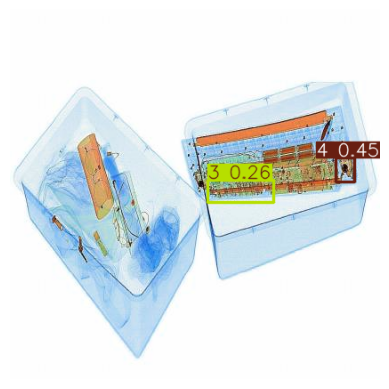

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010634_jpg.rf.00a2daa8263d63df21f4b1f04f5a4ee4.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010654_jpg.rf.72501225539fe45ec27dd669babb3f1d.jpg: 480x480 1 2, 49.6ms
Speed: 3.0ms preprocess, 49.6ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 480)


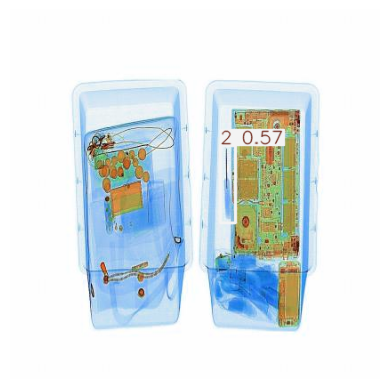

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010654_jpg.rf.72501225539fe45ec27dd669babb3f1d.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010739_jpg.rf.3da7df61a807dc5835f703e39f2ba22a.jpg: 480x480 1 2, 50.1ms
Speed: 4.0ms preprocess, 50.1ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 480)


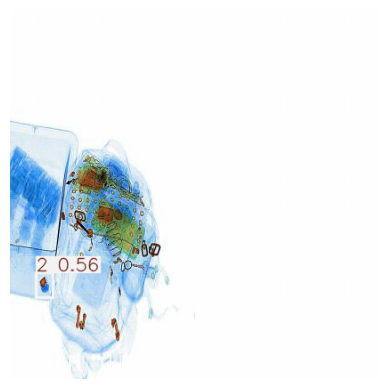

In [5]:
# test/images/010739_jpg.rf.3da7df61a807dc5835f703e39f2ba22a.jpg
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010739_jpg.rf.3da7df61a807dc5835f703e39f2ba22a.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\010832_jpg.rf.7b9478c3cab6bba6cb6023b231649f3f.jpg: 480x480 1 2, 49.5ms
Speed: 3.0ms preprocess, 49.5ms inference, 4.6ms postprocess per image at shape (1, 3, 480, 480)


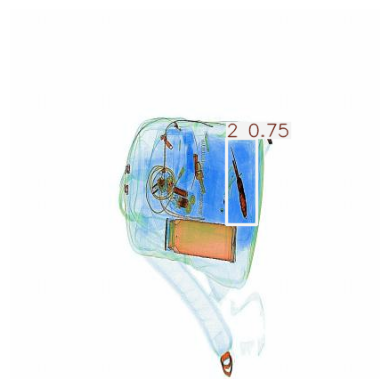

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/010832_jpg.rf.7b9478c3cab6bba6cb6023b231649f3f.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\011847_jpg.rf.059b195f5f393196ff7c22abc7dd49aa.jpg: 480x480 1 2, 49.6ms
Speed: 3.4ms preprocess, 49.6ms inference, 5.6ms postprocess per image at shape (1, 3, 480, 480)


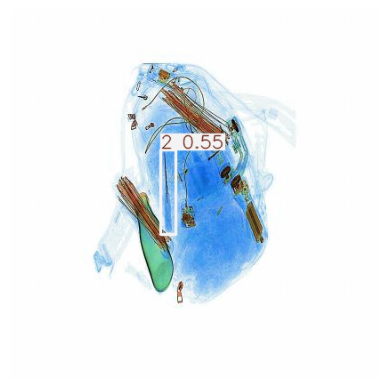

In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/011847_jpg.rf.059b195f5f393196ff7c22abc7dd49aa.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\test\images\016724_jpg.rf.1fb4585ee09e9c9ce9dd85435e5d3862.jpg: 480x480 1 0, 48.9ms
Speed: 3.2ms preprocess, 48.9ms inference, 7.5ms postprocess per image at shape (1, 3, 480, 480)


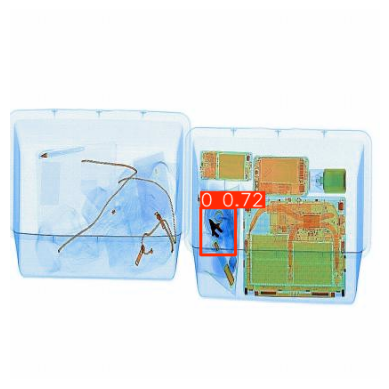

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("test/images/016724_jpg.rf.1fb4585ee09e9c9ce9dd85435e5d3862.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()


---

## Validation Dataset


image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\valid\images\009582_jpg.rf.6e925775be7d5149e96d4ab257af34d5.jpg: 480x480 1 2, 36.3ms
Speed: 3.4ms preprocess, 36.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 480)


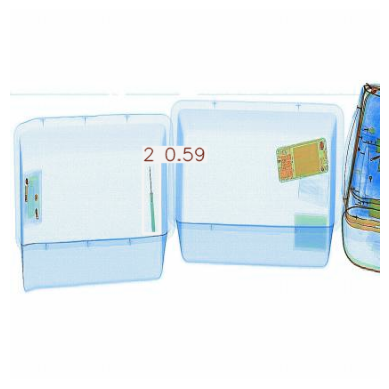

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("valid/images/009582_jpg.rf.6e925775be7d5149e96d4ab257af34d5.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()



image 1/1 C:\Users\OG-TPM\Documents\UNiversity FIles\03___5th_Semester\Deep_Learning\PRoject_COde\valid\images\009982_jpg.rf.b6ef4c260fb49fad520558b1e90ceefa.jpg: 480x480 1 2, 110.9ms
Speed: 2.1ms preprocess, 110.9ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 480)


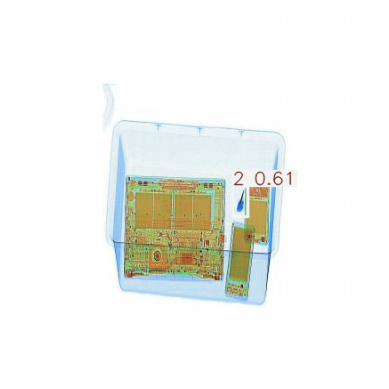

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model (update the path as needed)
model = YOLO("runs/detect/train8/weights/best.pt")  # Path to your trained model weights

# Run inference on a test image (replace with the actual path to your image)
results = model("valid/images/009982_jpg.rf.b6ef4c260fb49fad520558b1e90ceefa.jpg")  # Replace with your test image path

# Visualize and show the results with bounding boxes and labels
results[0].plot()  # Plots bounding boxes and labels on the image

# Alternatively, display the image using matplotlib (optional, for Jupyter notebooks)
plt.imshow(results[0].plot(show=False))  # Displays the image without opening a new window
plt.axis("off")
plt.show()
